In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data

The data is fetched directly from Sciensao's spreadsheet, and consolidated with @vdwnico's original values for the beginning of the time-series.

In [2]:
def consolidate(v1, v2):
    v1 = {k:v for k, v in v1}
    v2 = {k:v for k, v in v2}
    v2.update(v1)
    return [(k, v) for k, v in v2.items()]

In [3]:
# Hospitalizations
nico_hosps = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7,
    0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14,
    27), (15, 97), (16, 163), (17, 265), (18, 368), (19, 496), (20,
    649), (21, 842), (22, 1097), (23, 1381), (24, 1644), (25,
    1881), (26, 2138), (27, 2718), (28, 3072), (29, 3644), (30,
    4081), (31, 4474), (32, 4886), (33, 4979), (34, 5210), (35,
    5362), (36, 5497), (37, 5514), (38, 5606), (39, 5744), (40,
    5699), (41, 5597), (42, 5618), (43, 5645), (44, 5419), (45,
    5423), (46, 5536), (47, 5515), (48, 5309), (49, 5161), (50,
    5069), (51, 4871), (52, 4920), (53, 4976), (54, 4765), (55, 
    4527)] # last == April 22
    
df = pd.read_excel("https://epistat.sciensano.be/Data/COVID19BE.xlsx", sheet_name="HOSP")
sciensano_hosps = df.groupby("DATE")["TOTAL_IN"].sum()   # start on March 15
sciensano_hosps = [(i+17, v) for i, v in enumerate(sciensano_hosps)]
hosps = consolidate(sciensano_hosps, nico_hosps)

In [4]:
# ICUs
nico_icus = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7,
    0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 2), (14,
    15), (15, 24), (16, 33), (17, 53), (18, 79), (19, 100), (20,
    130), (21, 164), (22, 238), (23, 290), (24, 322), (25, 381), (26,
    474), (27, 605), (28, 690), (29, 789), (30, 867), (31, 927), (32,
    1021), (33, 1088), (34, 1144), (35, 1205), (36, 1245), (37,
    1261), (38, 1267), (39, 1260), (40, 1276), (41, 1285), (42,
    1278), (43, 1262), (44, 1232), (45, 1234), (46, 1226), (47,
    1204), (48, 1182), (49, 1140), (50, 1119), (51, 1081), (52,
    1071), (53, 1079), (54, 1020), (55, 993)]  # last == April 22
  
df = pd.read_excel("https://epistat.sciensano.be/Data/COVID19BE.xlsx", sheet_name="HOSP")
sciensano_icus = df.groupby("DATE")["TOTAL_IN_ICU"].sum()   # start on March 15
sciensano_icus = [(i+17, v) for i, v in enumerate(sciensano_icus)]
icus = consolidate(sciensano_icus, nico_icus)

In [5]:
# Daily deaths
nico_deaths = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7,
    0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 1), (14,
    3), (15, 3), (16, 5), (17, 5), (18, 10), (19, 10), (20, 19), (21,
    25), (22, 27), (23, 36), (24, 46), (25, 75), (26, 69), (27,
    91), (28, 91), (29, 115), (30, 128), (31, 133), (32, 158), (33,
    172), (34, 238), (35, 193), (36, 224), (37, 269), (38, 225), (39,
    267), (40, 299), (41, 321), (42, 275), (43, 323), (44, 283), (45,
    338), (46, 270), (47, 262), (48, 266), (49, 240), (50, 191), (51,
    98), (52, 22), (53, 170), (54, 266), (55, 230)]  # last == April 22

df = pd.read_excel("https://epistat.sciensano.be/Data/COVID19BE.xlsx", sheet_name="MORT")
sciensano_deaths = df.groupby("DATE")["DEATHS"].sum()   # start on March 10
sciensano_deaths = [(i+12, v) for i, v in enumerate(sciensano_deaths)]
deaths = consolidate(sciensano_deaths, nico_deaths)

In [6]:
deaths[-5:]

[(52, 216), (53, 196), (54, 149), (55, 110), (56, 17)]

In [7]:
# Convert to pandas 
data = pd.DataFrame({
    "n_hospitalized": [i for _ , i in hosps],
    "n_icu": [i for _, i in icus],
    "n_daily_deaths": [i for _, i in deaths]
}, index=range(1, len(hosps)+1))

data["n_deaths"] = data["n_daily_deaths"].cumsum()

In [8]:
data.tail(20)

,n_hospitalized,n_icu,n_daily_deaths,n_deaths
37,5531,1261,273,2181
38,5620,1267,225,2406
39,5759,1260,268,2674
40,5715,1276,302,2976
41,5616,1285,323,3299
42,5636,1278,277,3576
43,5663,1262,328,3904
44,5437,1232,289,4193
45,5441,1234,339,4532
46,5554,1226,274,4806


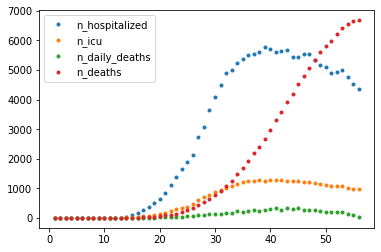

In [9]:
data.plot(style=".")

In [10]:
data.describe()

,n_hospitalized,n_icu,n_daily_deaths,n_deaths
count,56.000000,56.000000,56.000000,56.000000
mean,2868.910714,631.160714,119.267857,1907.089286
std,2403.370438,534.221737,116.580911,2348.449564
min,0.000000,0.000000,0.000000,0.000000
25%,79.500000,21.750000,3.000000,7.250000
50%,3363.500000,739.500000,92.500000,582.000000
75%,5247.750000,1153.500000,226.250000,3658.000000
max,5759.000000,1285.000000,339.000000,6679.000000


# SEIR model

Python re-implementation of Nicolas' original SEIR model.

In [11]:
# Parameters
frac_dh = 2985 / 6490  # deaths in hospitals / total deaths
window = 6          # size of the window for fitting Re's
hh = 0.05           # fraction of hospitalized 
gamma = 1 / 12.4    # inverse recovery time
epsilon = 1 / 5.2   # inverse incubation time 
dea = 0.5           # fatality rate in icu 
n0 = 11000000       # population size
n0_MRS = 400000     # Population en MR/MRS + personnel soignant

In [12]:
def smoothen(v, n_pts=5):
    box = np.ones(n_pts) / n_pts
    return np.convolve(v, box, mode="same")

def SEIR(r0, i0=3, gg=0.75, n_futures=0):
    # smoothen the values
    # > "compensate" for the greedy procedure and coarse grid
    r0 = smoothen(r0)
    
    # make the last r0s identical
    r0 = np.concatenate((r0, np.array([r0[-1]] * (window + n_futures))))
    
    n_days = len(r0)
    
    drea = dea * 1 / 5
    rrea = (1 - dea) * 1 / 20
    n = [n0]
    i = [i0]
    e = [i[-1] * 37]
    h = [0.0]
    l = [0.0]
    r = [0.0]
    m = [0.0]
    s = [n[-1] - e[-1] - i[-1] - r[-1]]
    hospi = 0.0
    
    for day in range(n_days):
        lam = gamma * r0[day]
        
        if day == 14:
            hospi = hh / 7
            
        ds = -lam * (i[-1] / 2 + e[-1]) * s[-1] / n[-1]
        de = lam * (i[-1] / 2 + e[-1]) * s[-1] / n[-1] - epsilon * e[-1]
        di = epsilon * e[-1] - gamma * i[-1] - hospi * i[-1]
        dh = hospi * i[-1] - gg * h[-1] / 7 - (1 - gg) * h[-1] / (4 + 2 * np.tanh((l[-1]-500)/300))
        dl = (1 - gg) * h[-1] / (4 + 2 * np.tanh((l[-1]-500)/300)) - drea * l[-1] - rrea * l[-1]
        dr = gamma * i[-1] + rrea * l[-1] + gg * h[-1] / 7
        dm = drea * l[-1] 
        
        s.append(s[-1] + ds)
        e.append(e[-1] + de)
        i.append(i[-1] + di)
        h.append(h[-1] + dh)
        l.append(l[-1] + dl)
        if l[-1] > 1895:
            dm = dm + (l[-1] - 1895)
            l[-1] = 1895
        r.append(r[-1] + dr)
        m.append(m[-1] + dm)
        n.append(s[-1] + e[-1] + i[-1] + h[-1] + l[-1] + r[-1])
        
    return np.array(s), np.array(e), np.array(i), np.array(h), np.array(l), np.array(m), np.array(r)

def SEIR_MRS(r0_mrs, n_futures=0):
    # smoothen the values
    # > "compensate" for the greedy procedure and coarse grid
    r0_mrs = smoothen(r0_mrs)
    
    # make the last r0s identical
    r0_mrs = np.concatenate((r0_mrs, np.array([r0_mrs[-1]] * (window + n_futures))))
    
    n_days = len(r0_mrs)
    
    alpha = 0.15 / 10
    lam = gamma * 4.3
    n = [n0_MRS]
    i = [1]
    e = [i[-1]*20]
    r = [0.0]
    s = [n[-1] - e[-1] - i[-1] - r[-1]]
    m = [0.0]
    
    for day in range(n_days):
        lam = gamma * r0_mrs[day]
        
        ds = -lam * (i[-1] / 2 + e[-1]) * s[-1] / n[-1]
        de = lam * (i[-1] / 2 + e[-1]) * s[-1] / n[-1] - epsilon * e[-1]
        di = epsilon * e[-1] - (gamma + alpha) * i[-1]
        dr = gamma * i[-1]
        dm = alpha * i[-1]
        
        s.append(s[-1] + ds)
        e.append(e[-1] + de)
        i.append(i[-1] + di)
        r.append(r[-1] + dr)
        m.append(m[-1] + dm)
        n.append(s[-1] + e[-1] + i[-1] + r[-1])
        
    return np.array(s), np.array(e), np.array(i), np.array(m), np.array(r)

# Parameter fit

The procedure is different from Nicolas'. All parameters are fit jointly, instead of using a greedy procedure to fit parameters sequentially. Results are therefore slightly different.

In [13]:
from scipy.optimize import minimize

In [14]:
def pack(r0, r0_rms, i0, gg):
    v = np.zeros(len(r0) + len(r0_rms) + 2)
    v[:len(r0)] = r0
    v[len(r0):len(r0)+len(r0_rms)] = r0_rms
    v[-2] = i0
    v[-1] = gg
    return v 

def unpack(v):
    return v[:(len(v)-2)//2], v[(len(v)-2)//2:len(v)-2], v[-2], v[-1]

In [15]:
from scipy.stats import norm, poisson
from scipy.special import gammaln

def normal_logpdf(x, mu, sigma=1):
    return norm.logpdf(x, loc=mu, scale=sigma).sum()

def poisson_logpdf(x, mu, sigma=None):
    #return poisson.logpmf(x, mu).sum()
    return (x * np.log(mu.astype(float) + 1e-10) - mu - gammaln(x.astype(float) + 1e-10)).sum()

def cost(x):
    # parameters
    r0, r0_mrs, i0, gg = unpack(x)
    
    # cost
    c = 0.0
    logpdf = poisson_logpdf
    
    s, e, i, h, l, m, r = SEIR(r0, i0=i0, gg=gg)
    c -= logpdf(data["n_hospitalized"].values[9:], mu=h[10:]+l[10:])
    c -= logpdf(data["n_icu"].values[9:], mu=l[10:])
    c -= logpdf(frac_dh * data["n_deaths"].values[9:-2], mu=m[10:-2])
    
    # fit on deaths with SEIR_MRS
    s, e, i, m_mrs, r = SEIR_MRS(r0_mrs)
    c -= logpdf(data["n_deaths"].values[:-2], mu=m[1:-2] + m_mrs[1:-2])
    
    # ^ we omit the last two death data points, because not consolidated yet

    return c
 
    
r0 = [4.3] * (len(data) - window)
r0_rms = [4.3] * (len(data) - window)
i0 = 3.0
gg = 0.75

bounds = []
for _ in range(len(r0)):
    bounds.append((0.3, 5.0))
for _ in range(len(r0_rms)):
    bounds.append((0.3, 6.3))
bounds.append((1, 50))
bounds.append((0.65, 0.85))

x0 = pack(r0, r0_rms, i0, gg)

res = minimize(cost, x0=x0, bounds=bounds, options={"maxfun": 100000})

In [16]:
res

      fun: 2570.5389976586566
 hess_inv: <102x102 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.70655471e+00, -4.85515557e+00, -6.00462045e+00, -5.81007953e+00,
       -5.68729774e+00, -5.62499736e+00, -5.52545316e+00, -5.37916094e+00,
       -5.13714440e+00, -4.76247806e+00, -4.15802788e+00, -3.20901563e+00,
       -2.23576535e+00, -1.34909897e+00, -6.36828190e-01, -1.68665792e-01,
       -6.99401426e-02, -5.90716809e-02, -1.42063072e-01, -4.51927917e-01,
       -1.09243956e+00, -1.98324415e+00, -2.76204446e+00, -2.96245162e+00,
       -2.35550033e+00, -8.36735126e-01,  1.30648914e+00,  3.54066287e+00,
        5.30530997e+00,  6.34440767e+00,  6.63153514e+00,  6.31243893e+00,
        5.59621185e+00,  4.70381565e+00,  3.80478014e+00,  2.96404323e+00,
        2.23026291e+00,  1.60707714e+00,  1.11685949e+00,  7.70251063e-01,
        5.68616088e-01,  5.33054845e-01,  6.22003427e-01,  7.37509254e-01,
        8.24820745e-01,  8.61655280e-01,  8.38372216e-01,  1.17797754e+00,

In [17]:
r0, r0_mrs, i0, gg = unpack(res.x)
print(r0)
print(r0_mrs)
print(i0)
print(gg)

[4.87747695 4.94107787 4.92720871 4.92897297 4.92981533 4.85788794
 4.84573949 4.72751226 4.87152085 4.66607724 4.34184088 3.83979041
 3.34126313 2.95193058 2.76764694 2.87382399 3.35811031 3.67945434
 4.97040119 4.95137178 4.78747046 4.27958205 3.23695412 1.58661825
 0.49373603 0.31680082 0.95130077 0.30001125 0.3        0.3
 0.3        0.3        0.3        0.3        0.3        2.29045197
 0.3940256  0.31651062 0.63209596 0.9551362  1.11872867 1.13040498
 1.02741408 0.86878392 0.69646537 0.86522873 0.68284522 1.73493221
 0.66238477 1.11528177]
[3.12806688 3.58780771 4.0607032  4.0894643  4.14289867 4.21914061
 4.29575189 4.37090065 4.44132511 4.50409076 4.55591404 4.59479014
 4.61903133 4.62768995 4.62109702 4.60014067 4.56422358 4.51669499
 4.45749121 4.38727557 4.30344864 4.20781486 4.10195899 3.986239
 3.86246656 3.72829947 3.5812065  3.41098098 3.20868118 2.96318028
 2.66965842 2.33059413 1.94890658 1.53581418 1.10709937 0.67773747
 0.56942576 1.38994641 1.30250234 0.38267884 0.

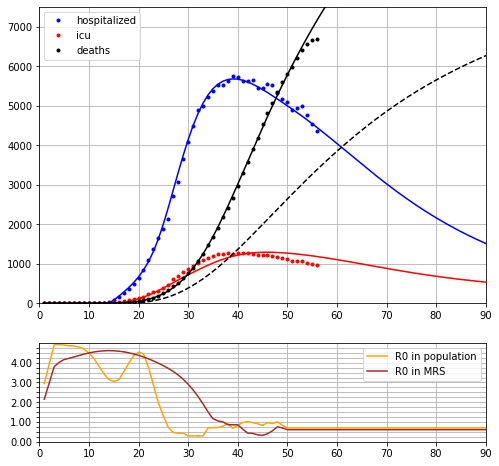

In [18]:
# Plots
r0, r0_mrs, i0, gg = unpack(res.x)
n_futures = 365
s, e, i, h, l, m, r = SEIR(r0, i0=i0, gg=gg, n_futures=n_futures)
_, _, _, m_mrs, _ = SEIR_MRS(r0_mrs, n_futures=n_futures)
n_days = len(data)

fig, ax = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={"height_ratios": (3,1)})

ax[0].plot(range(1, n_days+1 + n_futures), h[1:]+l[1:], c="b")
ax[0].plot(range(1, n_days+1), data["n_hospitalized"].values, ".", c="b", label="hospitalized")
ax[0].plot(range(1, n_days+1 + n_futures), l[1:], c="r")
ax[0].plot(range(1, n_days+1), data["n_icu"].values, ".", c="r", label="icu")
ax[0].plot(range(1, n_days+1 + n_futures), m[1:] + m_mrs[1:], c="k")
ax[0].plot(range(1, n_days+1 + n_futures), m[1:], "--", c="k")
ax[0].plot(range(1, n_days+1), data["n_deaths"].values, ".", c="k", label="deaths")
ax[0].grid()
ax[0].set_ylim(0, 7500)
ax[0].set_xlim(0, 90)
ax[0].legend()


r0 = smoothen(r0)
r0_mrs = smoothen(r0_mrs)
r0 = np.concatenate((r0, np.array([r0[-1]] * (window + n_futures))))
r0_mrs = np.concatenate((r0_mrs, np.array([r0_mrs[-1]] * (window + n_futures))))

ax[1].plot(range(1, n_days+1 + n_futures), r0, c="orange", label="R0 in population")
ax[1].plot(range(1, n_days+1 + n_futures), r0_mrs, c="brown", label="R0 in MRS")
ax[1].grid(which="both")
ax[1].set_ylim(0, 5)
ax[1].set_yticks(np.arange(0, 5, step=0.25))

for i, l in enumerate(ax[1].get_yticklabels()):
    if i % 4 != 0:
        l.set_visible(False)
ax[1].set_xlim(0, 90)
ax[1].legend()

plt.show()